# Examples to the Medium article "Monte Carlo Methods in Reinforcement Learning"

In this notebook I want to give a practical example of an application of the described methods in the medium [article](https://medium.com/@sebastian.dittert3692/reinforcement-learning-temporal-difference-learning-part-1-339fef103850).

This notebook covers code expamples for:
- TD(0) learning
- 

All Algorithms are applied to the Gridworld toy example which will be explained below.

## Gridworld Environment

The reinforcement learning problem where the named algorithms are applied to is Gridworld. Gridworld is and environment where the agent spawns in a starting position and needs to find a goal state on a discrete stationary grid. The agent has four different actions he can perform, these are: [Up (0), Right (1), Left (2), Down (3)]. The following image shows the environment:

![environment](images/gridworld.png)

Every field in the environment has its state number in the upper left corner. Starting position is state 8 in the bottom left hand corner. For each step the agent can move one field in one direction. If the agent is at the edge of the environment, for example state 4 and takes action 2 (move left) he bounces back to its original position, that is state 4. Field nr 5 are rocks and can not be entered. the agent moves back to its position. The goal state is state 3 where the agent receives a reward of +1 below state 3 is state 7. If the agent enters state 7 he receives a negative reward of -1. For each step the agent takes he receives a reward of -0.1. One episode ends if the agent reaches the goal state or after 30 interactions. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "serif"
import copy
from gridworld import *

![TD0](images/TD_0.png)

In [9]:
# init the environment:
max_episodes = 5000
env = Gridworld(step_cost=-0.1,max_ep_length=30)

state_value_grid = np.zeros(12) # state vale grid
state_value_grid[3] = 1 # Goal
state_value_grid[7] = -1 # Death
g = 0.99 # discounting factor
alpha = 0.01 # learning rate

In [10]:
for ep in range(max_episodes):
    G = 0
    state = env.reset()
    while True:        
        action = np.random.randint(4) #random policy
        next_state, reward, done = env.step(action)
        
        # Updating 
        state_value_grid[state] += alpha*(reward + g*state_value_grid[next_state] - state_value_grid[state])
        state = next_state
        if done:
            break




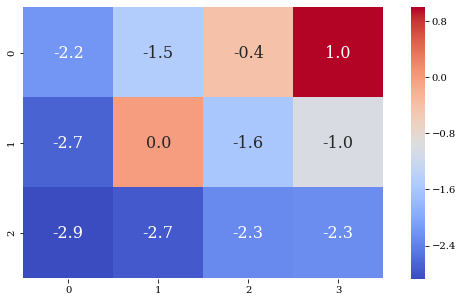

In [11]:
# Plot of the grid with values of each state
plot_state_value_grid(state_value_grid.reshape((3,4)))